# C3.AI Covid Data Analysis Challenge

**This is a data analysis challenge for COVID-19 to generate insights and trends majorly from the C3.AI Covid-19 Data Lake source **

In this this insights are generated only for Australia. Also, this project consists of  three data sources fetched from C3.AI Covid-19 Data Lake and two data sources which are not from the data lake.All of the are as follows:

- Johns Hopkins University: COVID-19 Data Repository - C3.ai COVID-19 datalake
- Apple: COVID-19 Mobility Trends                    - C3.ai COVID-19 datalake
- Google: COVID-19 Community Mobility Reports        - C3.ai COVID-19 datalake
- Corona Data Scrapper, timeseries data
- Covid-19 data hub, National cumulative csv.

- **Code script file** There are four code script files, three for analysis covid-19 cases and its traits and the last one for analysis different mobility trends during Covid-19.

- **Data Analysis Tableau Dashboards**- All the exploratory data analysis has been done on Tableau dashboards.

# 2. API Used
-**Data Lake API used**- 
1. Evalmetrics- Outbreak location

# 3. Launch

## 3.1. Technologies 

**1.Python**- Python programming language is utilized as a standalone base to solve the purpose of the project.

**2.Jupyter IDE**- Jupyter is utilized as a platform to write code scripts in python and do the data pre-processing, visualization, and Machine Learning tasks.

**Pandas**- Pandas library in python is put to use for data manipulation and analysis.

**3.NumPy**- NumPy library of python is used for statistical purposes and also for making use of multidimensional arrays.

**4.Matplotlib**-This library of python is used for data visualization.

**5.seaborn**- This library of python is used for data visualization.

**6.scikit-learn**- The sklearn library is used for building Machine learning models like Linear regression and RandomForest Regressor. It also gives the functionality of splitting the data into train and test sets and is useful for calculating the statistical scores like RMSE, accuracy score, and Mean absolute error. Lastly, its functionality also extends to assisting in finding multicollinearity and doing cross-fold validation.

**7.c3aidatalake**- To fetch the required datasets from C3.AI covid-19 datalake.

## 3.2. Launch

### 3.2.1. Setup

To run the code script please follow the steps below.

1. Install Anaconda(64-bit graphical installer version, if not previously installed), it can be installed via https://www.anaconda.com/products/individual

2.Launch Jupyter Notebook(version 6.0.3) from the anaconda navigator page or it can be directly launched from the terminal if Anaconda is previously installed(in case of MacBook).

3.Download the code script from this GitHub repository and save it in your working directory of Jupyter notebook. Alternatively, the code script can be uploaded directly in the jupyter notebook.

4.The required datasets also needs to be uploaded in the current working directory of jupyter.

4.Install the required libraries if not previously installed.

5.Import the list of libraries below.

# Project Status
This project is developed and can be used for further development.


# Example of use

1.The Tableau Dashboards can be utilised for observing the COVID-19 cases and traits nationally for Australia and the states. 

2.The Tableau dashboards can also be put into application for observing and knowing the trends and mobility behaviours during COVID-19 pandemic.


# References

1.Covid-19 data hub.Retrieved from https://github.com/M3IT/COVID-19_Data/blob/master/Data/COVID19_Data_Hub.csv

2.Corona Data Scrapper, timeseries data. Retrieved https://coronadatascraper.com/#home

3.C3.AI Documentations. Retrieved from https://c3.ai/covid-19-api-documentation/#section/C3.ai-APIs-for-COVID-19-Unified-Data



# C3.AI Covid Challenge
## _Data Science Project 
### Author: 
- Vrisha Parekh (https://www.linkedin.com/in/vrisha-parekh-72a630131/)
- Sreetam Dev (https://www.linkedin.com/in/sreetam-dev-b76530143/)

### Dataset

This is a C3.AI Covid-19 Challenge Outbreak location datafile. John Hopkins dataset consists of the projections of the COVID-19 cases from Jan-Nov11, 2020. 

### Associated tasks
=========================================

Analyse and generate insights from the COVID-19 John Hopkins dataset by fetching the dataset from the C3.AI COVID-19 datalake.



### Table of Contents


- **1.  Loading libraries**

- **2.  Exploring the data**

    - *2.1  Setting DateTimeIndex*
    
- **3.Exploratory Data Analysis**
   
- **4.Loading the data from Covid-19 Data Hub**
    - 4.1 Setting DateTime index
    - 4.2. Creating subsets for national and state level data

- **5. Defining Metrics**
    - 5.1. caseFatalityRate
    - 5.2. crudeMortalityRate
    - 5.3. positiveTestRate

#### 1.Loading Libraries

In [399]:
#Importing Libraries
import requests
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import gamma
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
plt.style.use('ggplot')

In [400]:
#Importing the C3.AI datalake
import c3aidatalake


#### 2. Exploring the data

JHU DailyReports data

In [401]:
#Fetching the data from the C3.AI Covid-19 datalake.
# Total number of confirmed cases, deaths, and recoveries from John Hopkins University data(can use only evalmetrics)
today = pd.Timestamp.now().strftime("%Y-%m-%d")

cases_JHU = c3aidatalake.evalmetrics(
    "outbreaklocation",
    {
        "spec" : {
            "ids" : ["Australia"],
            "expressions" : ["JHU_ConfirmedCases", "JHU_ConfirmedDeaths", "JHU_ConfirmedRecoveries"],
            "start" : "2020-01-01",
            "end" : today,
            "interval" : "DAY",
        }
    }
)

cases_JHU

,dates,Australia.JHU_ConfirmedCases.data,Australia.JHU_ConfirmedCases.missing,Australia.JHU_ConfirmedDeaths.data,Australia.JHU_ConfirmedDeaths.missing,Australia.JHU_ConfirmedRecoveries.data,Australia.JHU_ConfirmedRecoveries.missing
0,2020-01-01,0,100,0,100,0,100
0,2020-01-02,0,100,0,100,0,100
0,2020-01-03,0,100,0,100,0,100
0,2020-01-04,0,100,0,100,0,100
0,2020-01-05,0,100,0,100,0,100
...,...,...,...,...,...,...,...
0,2020-11-13,27682,0,907,0,0,100
0,2020-11-14,27711,0,907,0,0,100
0,2020-11-15,27749,0,907,0,0,100
0,2020-11-16,27754,0,907,0,0,100


In [402]:
#Shape of the data
print('The shape of data is-',cases_JHU.shape)

The shape of data is- (322, 7)


In [403]:
#Finding missing values.

cases_JHU.isnull().any()


dates                                        False
Australia.JHU_ConfirmedCases.data            False
Australia.JHU_ConfirmedCases.missing         False
Australia.JHU_ConfirmedDeaths.data           False
Australia.JHU_ConfirmedDeaths.missing        False
Australia.JHU_ConfirmedRecoveries.data       False
Australia.JHU_ConfirmedRecoveries.missing    False
dtype: bool

There are no nulls in the dataframe.

In [404]:
#exploring the stats of the dataset
cases_JHU.describe()

,dates,Australia.JHU_ConfirmedCases.data,Australia.JHU_ConfirmedCases.missing,Australia.JHU_ConfirmedDeaths.data,Australia.JHU_ConfirmedDeaths.missing,Australia.JHU_ConfirmedRecoveries.data,Australia.JHU_ConfirmedRecoveries.missing
count,322,322.0,322.0,322.0,322.0,322.0,322.0
unique,322,264.0,2.0,137.0,2.0,1.0,1.0
top,2020-03-13 00:00:00,0.0,0.0,0.0,0.0,0.0,100.0
freq,1,25.0,301.0,60.0,301.0,322.0,322.0
first,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-11-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [405]:
#Knowing the percentage of the data available and not.
#ConfirmedCases.missing=0
print('Available data',(len(cases_JHU[cases_JHU['Australia.JHU_ConfirmedCases.missing']==0])/len(cases_JHU))*100)

#ConfirmedCases.missing=100
print('Not-available data',(len(cases_JHU[cases_JHU['Australia.JHU_ConfirmedCases.missing']==100])/len(cases_JHU))*100)

Available data 93.47826086956522
Not-available data 6.521739130434782


In [406]:
#Finding duplicate records
cases_JHU.duplicated()

0    False
0    False
0    False
0    False
0    False
     ...  
0    False
0    False
0    False
0    False
0    False
Length: 322, dtype: bool

In [407]:
#Making a deep copy
cases_JHUCopy= cases_JHU.copy()


In [408]:
#Dropping the non-required rows.
cases_JHUCopy.drop(['Australia.JHU_ConfirmedCases.missing','Australia.JHU_ConfirmedDeaths.missing',
                    'Australia.JHU_ConfirmedRecoveries.missing','Australia.JHU_ConfirmedRecoveries.data'],inplace=True,axis=1)

In [409]:
#Observing the datatypes of each feature.
cases_JHUCopy.dtypes


dates                                 datetime64[ns]
Australia.JHU_ConfirmedCases.data             object
Australia.JHU_ConfirmedDeaths.data            object
dtype: object

In [410]:
#Converting object dtype to numeric
cases_JHUCopy[['Australia.JHU_ConfirmedCases.data','Australia.JHU_ConfirmedDeaths.data']]=cases_JHUCopy[['Australia.JHU_ConfirmedCases.data','Australia.JHU_ConfirmedDeaths.data']].apply(pd.to_numeric)


#### 2.1 Setting DateTimeIndex

In [411]:
#setting date as the index
cases_JHUCopy=cases_JHUCopy.set_index('dates')


In [412]:
#Adding the year, month and day name features.
cases_JHUCopy['Year']= cases_JHUCopy.index.year
cases_JHUCopy['Month']= cases_JHUCopy.index.month
cases_JHUCopy['Weekday_name']= cases_JHUCopy.index.day_name()


#### 3. Exploratory Data Analysis

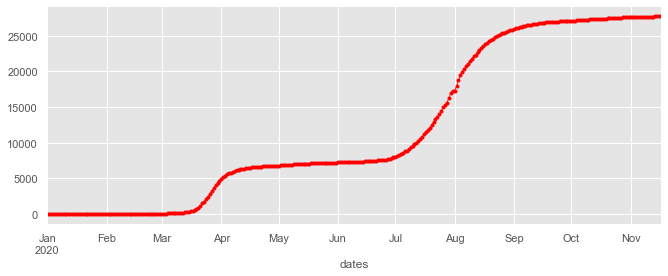

In [413]:
#Plotting the confirmed cases
cases_JHUCopy['Australia.JHU_ConfirmedCases.data'].plot(marker='.',linewidth=0.8,color='red')
plt.show()


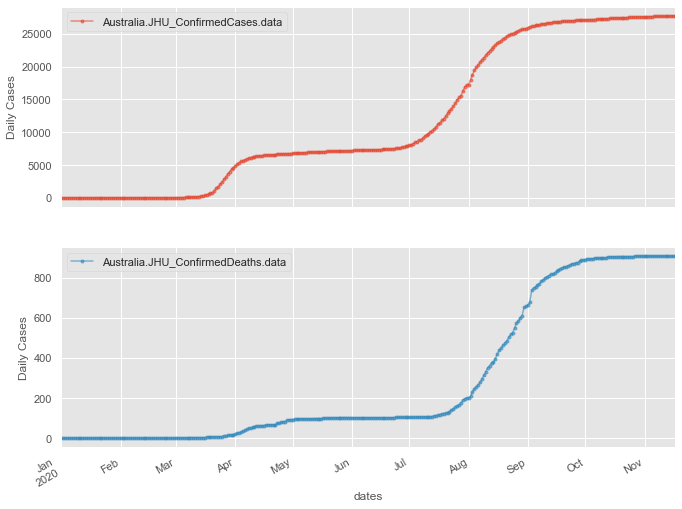

In [414]:
#Plotting confirmed and death cases.
cols_list=['Australia.JHU_ConfirmedCases.data','Australia.JHU_ConfirmedDeaths.data']

axes= cases_JHUCopy[cols_list].plot(marker='.',alpha=0.6,figsize=(11, 9),subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Cases')
plt.show()


Here it is observed that the cases started to grow in Australia near the end of March and peaked in september.

Death cases seem to move along with the trend of the confirmed cases.

#### 4. Loading the COVID-19 datahub datatset 

#### Exploring the Data

In [415]:
#Reading covid-19 data hub file, https://www.covid19data.com.au/
dataHubCases= pd.read_csv('COVID19_Data_Hub.csv')
dataHubCases.head()

,date,confirmed,deaths,tests,positives,recovered,hosp,icu,vent,population,administrative_area_level,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,id,state_abbrev
0,2020-01-25,4,0,0,0,0,0,0,0,25459470,1,Australia,NaN,NaN,99999999,NaN
1,2020-01-26,4,0,0,0,0,0,0,0,25459470,1,Australia,NaN,NaN,99999999,NaN
2,2020-01-27,5,0,0,0,0,0,0,0,25459470,1,Australia,NaN,NaN,99999999,NaN
3,2020-01-28,5,0,0,0,0,0,0,0,25459470,1,Australia,NaN,NaN,99999999,NaN
4,2020-01-29,9,0,0,0,0,0,0,0,25459470,1,Australia,NaN,NaN,99999999,NaN


In [416]:
print('Shape of the data is',dataHubCases.shape)

Shape of the data is (2664, 16)


In [417]:
#Observing the stats.
dataHubCases.describe()

,confirmed,deaths,tests,positives,recovered,hosp,icu,vent,population,administrative_area_level,administrative_area_level_3
count,2664.000000,2664.000000,2.664000e+03,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2.664000e+03,2664.000000,0.0
mean,2849.397147,67.932432,7.291222e+05,2849.004505,2300.730480,28.815315,4.001502,2.125375,5.657660e+06,1.888889,NaN
std,6229.615122,196.118426,1.563953e+06,6229.794438,5336.304698,100.406513,11.178106,6.351458,7.504464e+06,0.314329,NaN
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2.455620e+05,1.000000,NaN
25%,33.000000,0.000000,1.105525e+04,33.000000,29.000000,0.000000,0.000000,0.000000,5.355000e+05,2.000000,NaN
50%,440.000000,6.000000,9.451950e+04,440.000000,319.500000,0.000000,0.000000,0.000000,2.630557e+06,2.000000,NaN
75%,1410.250000,15.000000,5.262708e+05,1410.250000,1163.000000,10.000000,1.000000,0.000000,6.629870e+06,2.000000,NaN
max,27728.000000,907.000000,9.379339e+06,27728.000000,25125.000000,694.000000,96.000000,46.000000,2.545947e+07,2.000000,NaN


In [418]:
#Evaluating the dtypes of different columns
dataHubCases.dtypes

date                            object
confirmed                        int64
deaths                           int64
tests                            int64
positives                        int64
recovered                        int64
hosp                             int64
icu                              int64
vent                             int64
population                       int64
administrative_area_level        int64
administrative_area_level_1     object
administrative_area_level_2     object
administrative_area_level_3    float64
id                              object
state_abbrev                    object
dtype: object

In [419]:
#Renaming the columns
dataHubCases.columns= ['dates','confirmed', 'deaths', 'tests', 'positives', 'recovered', 'hosp', 'icu',
       'vent', 'population', 'administrative_area_level',
       'administrative_area_level_1', 'administrative_area_level_2',
       'administrative_area_level_3', 'id', 'state_abbrev']

In [420]:
#Checking fir nulls.
dataHubCases.isnull().any()

dates                          False
confirmed                      False
deaths                         False
tests                          False
positives                      False
recovered                      False
hosp                           False
icu                            False
vent                           False
population                     False
administrative_area_level      False
administrative_area_level_1    False
administrative_area_level_2     True
administrative_area_level_3     True
id                             False
state_abbrev                    True
dtype: bool

In [421]:
#Finding duplicate records
print('Duplicate records=',dataHubCases.duplicated())
dataHubCases.drop_duplicates()

Duplicate records= 0       False
1       False
2       False
3       False
4       False
        ...  
2659    False
2660    False
2661    False
2662    False
2663    False
Length: 2664, dtype: bool


,dates,confirmed,deaths,tests,positives,recovered,hosp,icu,vent,population,administrative_area_level,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,id,state_abbrev
0,2020-01-25,4,0,0,0,0,0,0,0,25459470,1,Australia,NaN,NaN,99999999,NaN
1,2020-01-26,4,0,0,0,0,0,0,0,25459470,1,Australia,NaN,NaN,99999999,NaN
2,2020-01-27,5,0,0,0,0,0,0,0,25459470,1,Australia,NaN,NaN,99999999,NaN
3,2020-01-28,5,0,0,0,0,0,0,0,25459470,1,Australia,NaN,NaN,99999999,NaN
4,2020-01-29,9,0,0,0,0,0,0,0,25459470,1,Australia,NaN,NaN,99999999,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2659,2020-11-15,1185,6,1292903,1185,1171,6,0,0,5115451,2,Australia,Queensland,NaN,36068882,QLD
2660,2020-11-15,526,4,589008,526,503,1,0,0,1756494,2,Australia,South Australia,NaN,165128d0,SA
2661,2020-11-15,230,13,122974,230,217,0,0,0,535500,2,Australia,Tasmania,NaN,86525f8e,TAS
2662,2020-11-15,20345,819,3398653,20345,19523,2,0,0,6629870,2,Australia,Victoria,NaN,6c5dccdb,VIC


In [422]:
#Converting date to datetime
dataHubCases['dates']= dataHubCases['dates'].apply(pd.to_datetime)

#### 4.1 Setting to index to dateTimeIndex.

In [423]:

dataHubCases= dataHubCases.set_index('dates')

#### 4.2 Creating subsets for national and state level data

In [424]:

dataHubCasesNational=dataHubCases[dataHubCases['administrative_area_level']==1]
dataHubCasesState=dataHubCases[dataHubCases['administrative_area_level']==2]

https://www.datacamp.com/community/tutorials/joining-dataframes-pandas

In [425]:
#Merging both the dataframes
dataHubCasesNational= pd.merge(cases_JHUCopy,dataHubCasesNational,how='inner',left_index=True, right_index=True)
dataHubCasesNational

,Australia.JHU_ConfirmedCases.data,Australia.JHU_ConfirmedDeaths.data,Year,Month,Weekday_name,confirmed,deaths,tests,positives,recovered,hosp,icu,vent,population,administrative_area_level,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,id,state_abbrev
dates,,,,,,,,,,,,,,,,,,,,
2020-01-25,0.0,0.0,2020,1,Saturday,4,0,0,0,0,0,0,0,25459470,1,Australia,NaN,NaN,99999999,NaN
2020-01-26,4.0,0.0,2020,1,Sunday,4,0,0,0,0,0,0,0,25459470,1,Australia,NaN,NaN,99999999,NaN
2020-01-27,5.0,0.0,2020,1,Monday,5,0,0,0,0,0,0,0,25459470,1,Australia,NaN,NaN,99999999,NaN
2020-01-28,5.0,0.0,2020,1,Tuesday,5,0,0,0,0,0,0,0,25459470,1,Australia,NaN,NaN,99999999,NaN
2020-01-29,6.0,0.0,2020,1,Wednesday,9,0,0,0,0,0,0,0,25459470,1,Australia,NaN,NaN,99999999,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-11,27675.0,907.0,2020,11,Wednesday,27685,907,9212619,27685,25103,22,0,0,25459470,1,Australia,NaN,NaN,99999999,NaN
2020-11-12,27676.0,907.0,2020,11,Thursday,27698,907,9268481,27698,25108,22,0,0,25459470,1,Australia,NaN,NaN,99999999,NaN
2020-11-13,27682.0,907.0,2020,11,Friday,27703,907,9308474,27703,25114,22,0,0,25459470,1,Australia,NaN,NaN,99999999,NaN


In [426]:
dataHubCasesNational = dataHubCasesNational.asfreq('d')

In [427]:
#Finding duplicate records
print('Number of Duplicate records=',dataHubCasesNational.duplicated().sum())

Number of Duplicate records= 7


In [428]:
#Dropping duplicate records
dataHubCasesNational.drop_duplicates(inplace=True)

In [429]:
#Dropping unneccesary columns.
dataHubCasesNational.drop(['confirmed','deaths','administrative_area_level','administrative_area_level_1',
                          'administrative_area_level_2','administrative_area_level_3','id','state_abbrev'],inplace=True,axis=1)

In [430]:
#Renaming columns
dataHubCasesNational.columns=['confirmedCases','deaths', 'Year', 'Month', 'Weekday_name',
'tests', 'positives', 'recovered', 'hosp', 'icu', 'vent', 'population']

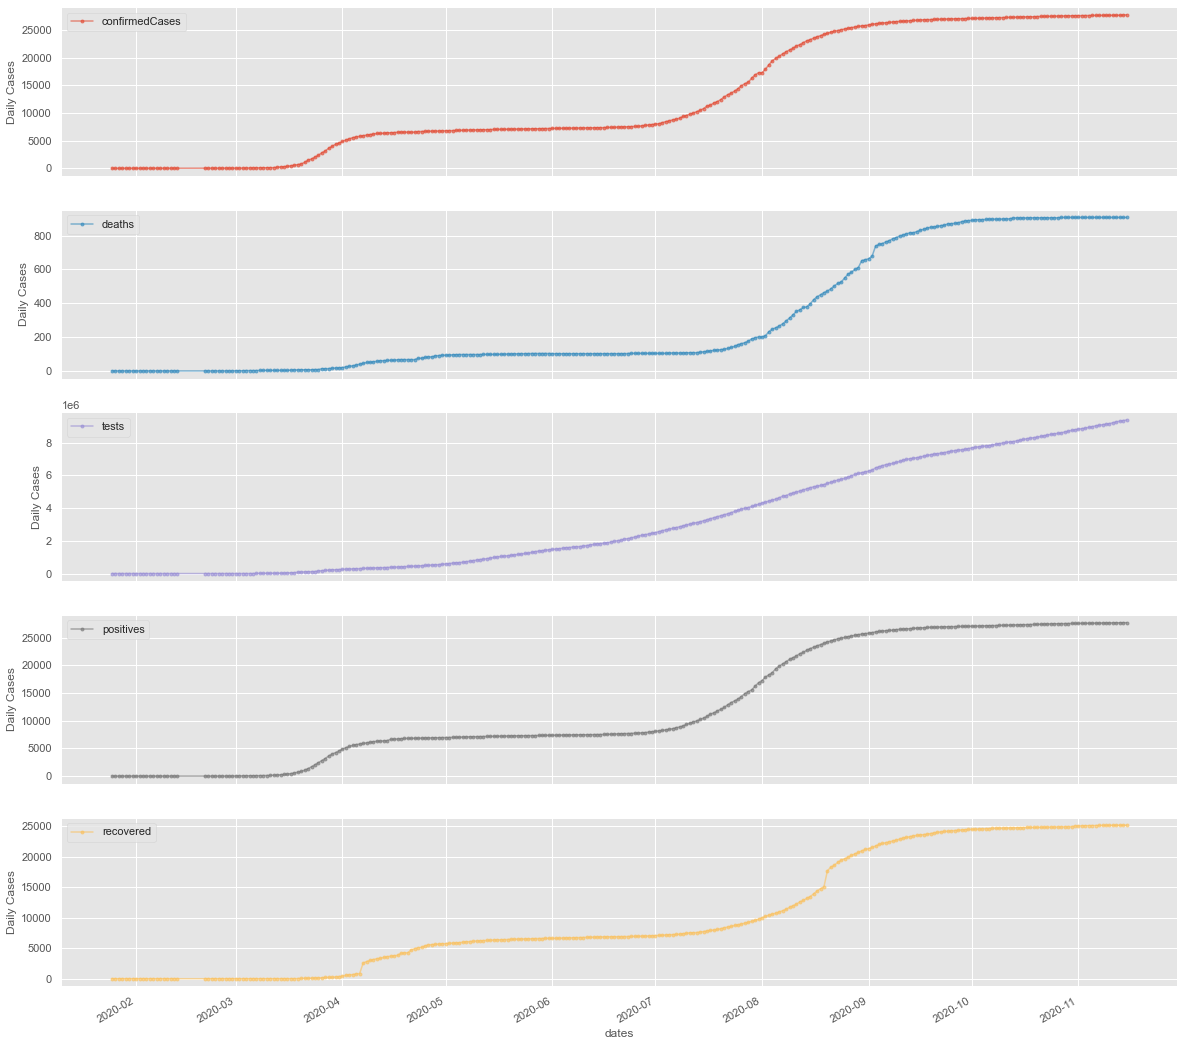

In [431]:
cols_list=['confirmedCases','deaths','tests','positives','recovered']

axes= dataHubCasesNational[cols_list].plot(marker='.',alpha=0.6,figsize=(20, 20),subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Cases')
plt.show()

From the above graphs it is observed that deaths, no. of tests, no.recoveries follow the similar trend to confirmed cases. They may be highly correalated to each other.

In [432]:
#Defining list of column names.
col_list=['confirmedCases', 'deaths','tests',
       'positives', 'recovered', 'hosp', 'icu', 'vent']

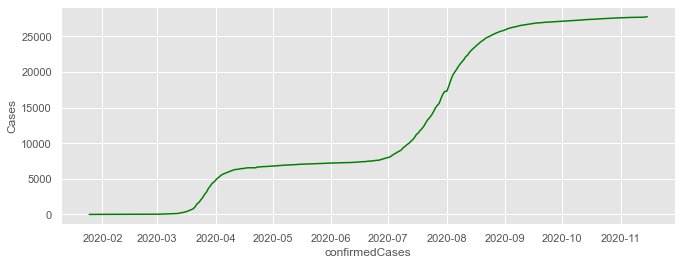

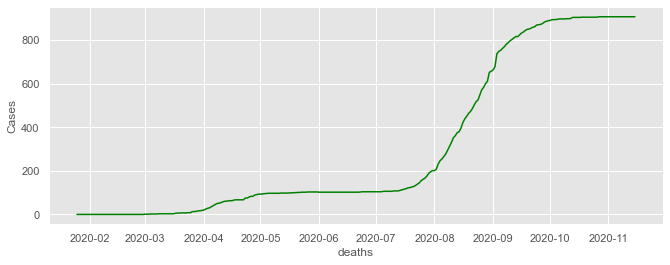

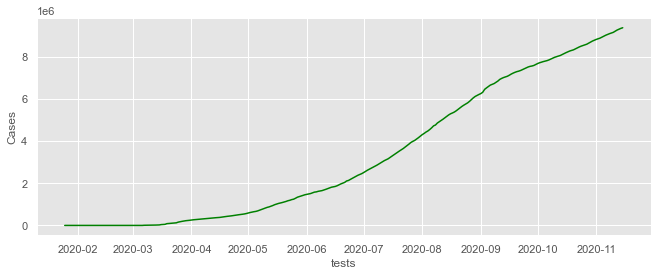

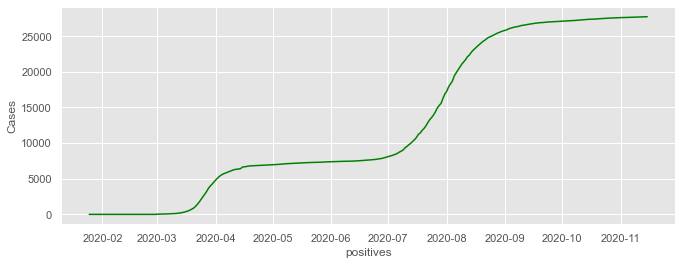

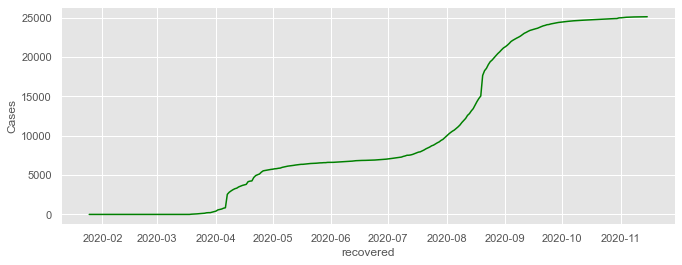

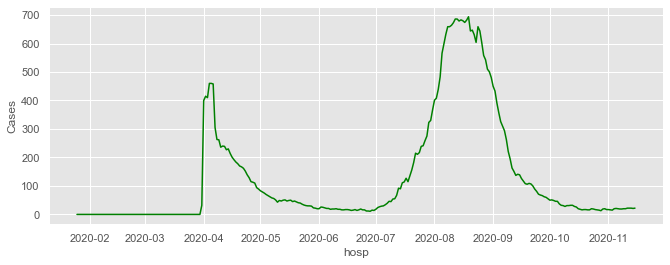

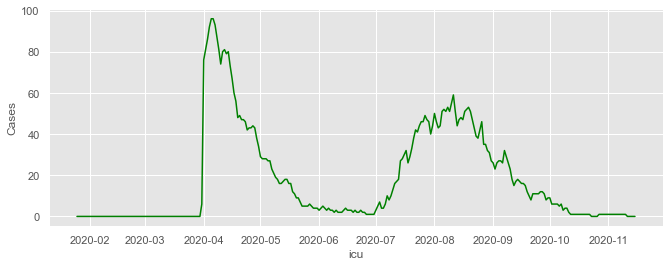

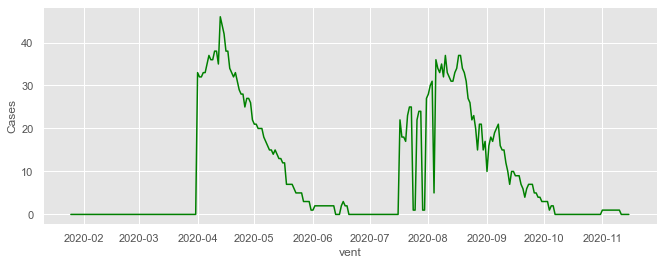

In [433]:
# Plotting the data

for each in col_list:
    plt.plot(dataHubCasesNational[each],color='green')
    plt.xlabel(each)
    plt.ylabel('Cases')
    plt.show()

#### 5. Defining Metrics

**5.1. caseFatalityRate- This metric is associated with the risk of death from COVID-19. It is the ratio of the total number of deaths and the total number of confirmedCases of COVID-19.**

In [434]:
#Adding the metric
#caseFatalityRate
dataHubCasesNational['cfr']= (dataHubCasesNational['deaths']/dataHubCasesNational['confirmedCases'])*100


**5.2.crudeMortalityRate- This metric is linked with the question of the probability of death for an infected person. It is the ratio of the total number of deaths and the total population.**

In [435]:

#crudeMortalityRate
dataHubCasesNational['cmr']=(dataHubCasesNational['deaths']/dataHubCasesNational['population'])*100


**5.3.positiveTestRate- This is the ratio of the total no of positive cases to the total number of tests conducted.**

In [436]:
#positveTestRate
dataHubCasesNational['positiveRateTest']=(dataHubCasesNational['positives']/dataHubCasesNational['tests'])*100


In [437]:
dataHubCasesNational.dropna(how='all',inplace=True)

In [438]:
dataHubCasesNational.isna().sum()

confirmedCases       0
deaths               0
Year                 0
Month                0
Weekday_name         0
tests                0
positives            0
recovered            0
hosp                 0
icu                  0
vent                 0
population           0
cfr                  1
cmr                  0
positiveRateTest    29
dtype: int64

In [439]:
#Filtering dataframe and removing na's
dataHubCasesNational=dataHubCasesNational[dataHubCasesNational['confirmedCases'].notnull()]

In [440]:
# Uncomment the line below to export the DataFrame as a .csv file
dataHubCasesNational.to_csv("NationalAusCases.csv")

In [441]:
dataHubCasesNational.head()

,confirmedCases,deaths,Year,Month,Weekday_name,tests,positives,recovered,hosp,icu,vent,population,cfr,cmr,positiveRateTest
dates,,,,,,,,,,,,,,,
2020-01-25,0.0,0.0,2020,1,Saturday,0,0,0,0,0,0,25459470,NaN,0.0,NaN
2020-01-26,4.0,0.0,2020,1,Sunday,0,0,0,0,0,0,25459470,0.0,0.0,NaN
2020-01-27,5.0,0.0,2020,1,Monday,0,0,0,0,0,0,25459470,0.0,0.0,NaN
2020-01-28,5.0,0.0,2020,1,Tuesday,0,0,0,0,0,0,25459470,0.0,0.0,NaN
2020-01-29,6.0,0.0,2020,1,Wednesday,0,0,0,0,0,0,25459470,0.0,0.0,NaN


#### Perfroming Stationary Test

In [307]:
from statsmodels.tsa.stattools import adfuller
def stationary_test(data):
    
    #Determing rolling statistics
    rolmean = data.rolling(window=12).mean()
    rolstd = data.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(data, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xlabel(each)
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(data, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


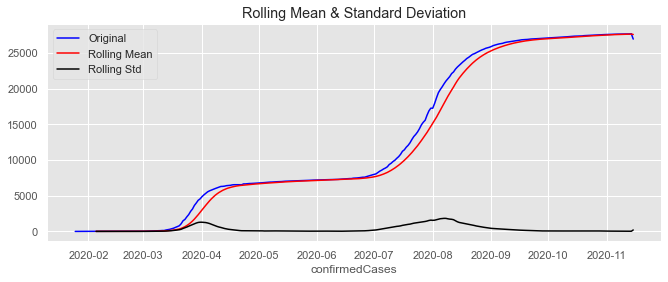

Results of Dickey-Fuller Test:
Test Statistic                  -1.575223
p-value                          0.496027
#Lags Used                      10.000000
Number of Observations Used    278.000000
Critical Value (1%)             -3.454094
Critical Value (5%)             -2.871993
Critical Value (10%)            -2.572340
dtype: float64


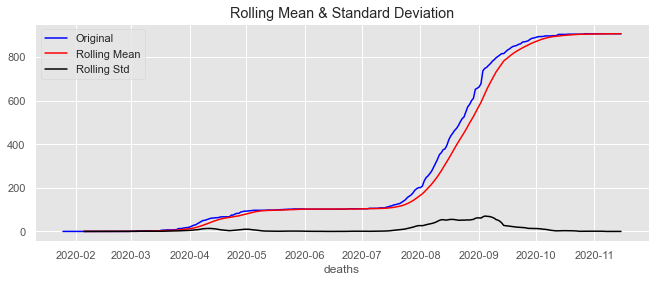

Results of Dickey-Fuller Test:
Test Statistic                  -1.108092
p-value                          0.711834
#Lags Used                      11.000000
Number of Observations Used    277.000000
Critical Value (1%)             -3.454180
Critical Value (5%)             -2.872031
Critical Value (10%)            -2.572360
dtype: float64


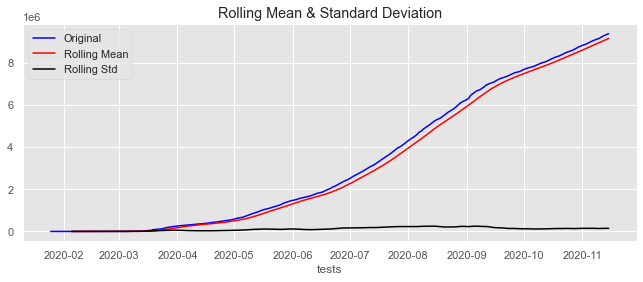

Results of Dickey-Fuller Test:
Test Statistic                  -0.376582
p-value                          0.913936
#Lags Used                      16.000000
Number of Observations Used    272.000000
Critical Value (1%)             -3.454622
Critical Value (5%)             -2.872225
Critical Value (10%)            -2.572464
dtype: float64


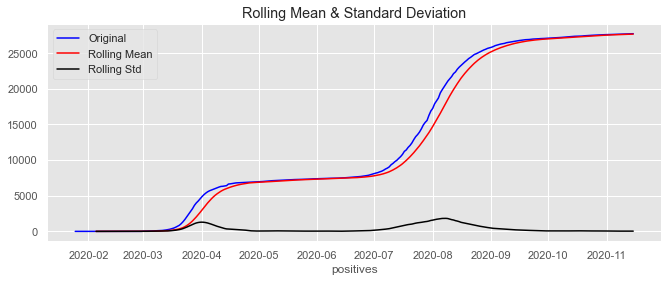

Results of Dickey-Fuller Test:
Test Statistic                  -0.809352
p-value                          0.816359
#Lags Used                       8.000000
Number of Observations Used    280.000000
Critical Value (1%)             -3.453922
Critical Value (5%)             -2.871918
Critical Value (10%)            -2.572300
dtype: float64


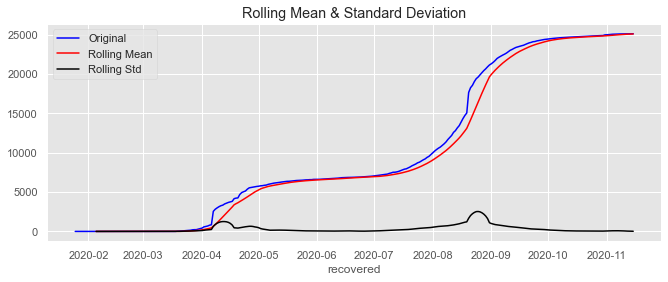

Results of Dickey-Fuller Test:
Test Statistic                  -0.094512
p-value                          0.949982
#Lags Used                       4.000000
Number of Observations Used    284.000000
Critical Value (1%)             -3.453587
Critical Value (5%)             -2.871771
Critical Value (10%)            -2.572222
dtype: float64


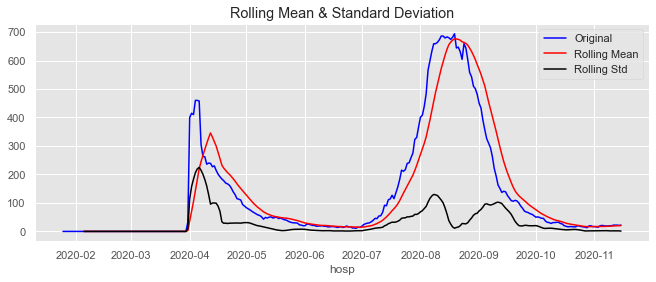

Results of Dickey-Fuller Test:
Test Statistic                  -2.207811
p-value                          0.203423
#Lags Used                       9.000000
Number of Observations Used    279.000000
Critical Value (1%)             -3.454008
Critical Value (5%)             -2.871956
Critical Value (10%)            -2.572320
dtype: float64


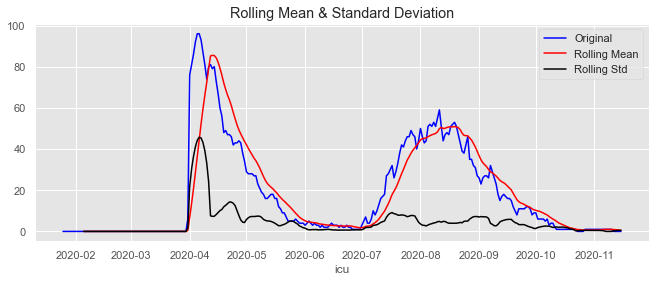

Results of Dickey-Fuller Test:
Test Statistic                  -2.117858
p-value                          0.237395
#Lags Used                       1.000000
Number of Observations Used    287.000000
Critical Value (1%)             -3.453342
Critical Value (5%)             -2.871664
Critical Value (10%)            -2.572164
dtype: float64


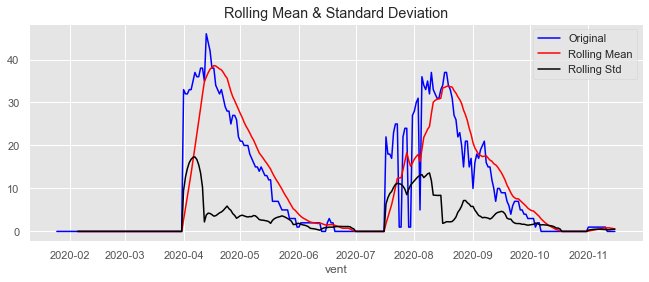

Results of Dickey-Fuller Test:
Test Statistic                  -2.139495
p-value                          0.228933
#Lags Used                       7.000000
Number of Observations Used    281.000000
Critical Value (1%)             -3.453838
Critical Value (5%)             -2.871881
Critical Value (10%)            -2.572280
dtype: float64


In [308]:
#Plotting the time series data.
for each in col_list:
    stationary_test(dataHubCasesNational[each])

The above graphs demonstrate that the data is highly non-stationary and mean varies along the timeseries data. Also, the test statistic is really high than the critical values.So we need to eliminate the mean from the data.

Two things which are making the timeseries data non-stationary here are:
1. Trend- Varying mean over time- On average the number of COVID-19 cases increases over time.

2. Seasonality- Variations at specific time, eg: COVID-19 cases might have increased in specific season. 

#### Eliminating trend

##### Transforming the data and taking moving average of last 12 months to forecast for the number of confirmed cases.

/Users/vrishaparekh/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


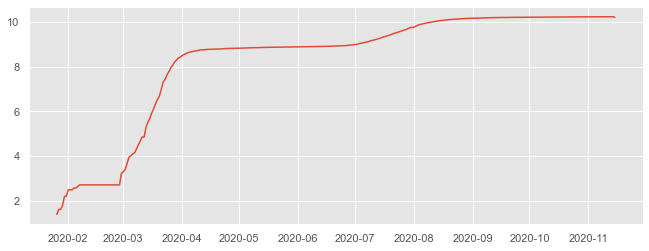

In [309]:
#Transforming the data
#Log transformation
ts_log = np.log(dataHubCasesNational['confirmedCases'])
plt.plot(ts_log)
plt.show()

In [310]:
#Function to replace infinite values and drop NaN's
def replaceInfinity(ts_log):
    ts_log.replace([np.inf,-np.inf], np.nan, inplace=True)
    ts_log.dropna(inplace=True)

In [311]:
replaceInfinity(ts_log)

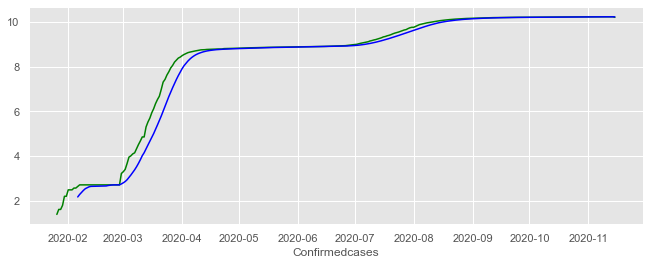

In [312]:
#Moving average for twelve months.
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log,color='green',label='logPlot')
plt.plot(moving_avg, color='blue',label='rolMean')
plt.xlabel('Confirmedcases')
plt.show()

In [313]:
replaceInfinity(moving_avg)

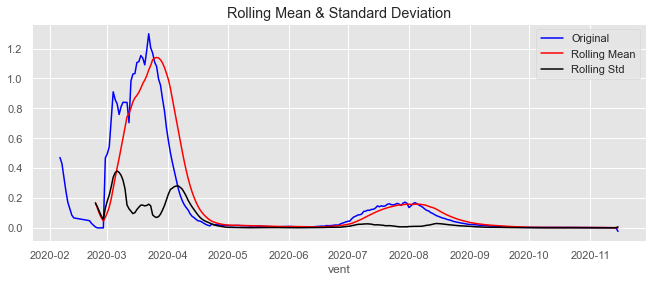

Results of Dickey-Fuller Test:
Test Statistic                  -3.779576
p-value                          0.003123
#Lags Used                      16.000000
Number of Observations Used    260.000000
Critical Value (1%)             -3.455754
Critical Value (5%)             -2.872721
Critical Value (10%)            -2.572728
dtype: float64


In [314]:

ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace=True)
stationary_test(ts_log_moving_avg_diff)

The test statistic is better than 1% critical value, so we can say with 99% confidence that the series is stationary.

#### As the series is stationary we can use ARIMA model to forecast the COVID-19 cases

In [315]:
#Plotting the ACF, PACF functions.
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

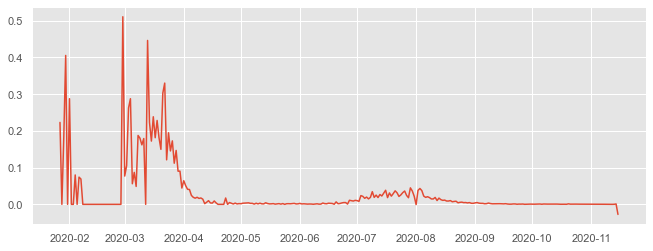

In [316]:

ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
plt.show()

In [317]:
replaceInfinity(ts_log_diff)

In [318]:
#Initiating the Auto Correlation and Partial Correlatio fucntions.

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

/Users/vrishaparekh/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


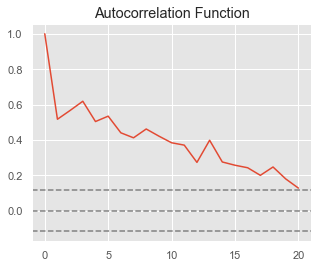

In [319]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

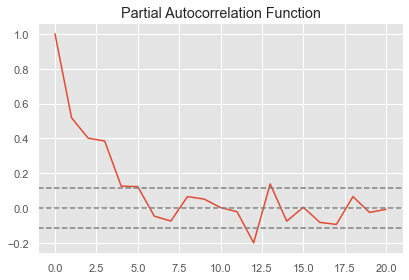

In [320]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

##### The p-value from PACF chart seems to be around 1.8 and same for the q-value from the ACF chart

In [321]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf

def arima_model(columnName,order):
    ts_log = np.log(dataHubCasesNational[columnName])
    replaceInfinity(ts_log)
    moving_avg = ts_log.rolling(12).mean()
    replaceInfinity(moving_avg)
    ts_log_diff = ts_log - ts_log.shift()
    replaceInfinity(ts_log_diff)
        
    # ACF & PACF Functions
    lag_acf = acf(ts_log_diff, nlags=20)
    lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')
        
    #Initiating the model, fitting it & plotting it
    model = ARIMA(ts_log, order=order)  
    results_AR = model.fit(disp=-1)  
    plt.plot(ts_log_diff, color='green',label='ts_log_diff')
    plt.plot(results_AR.fittedvalues, color='red',label='results_AR')
    plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))
    plt.xlabel(columnName)
    plt.legend(loc='best')
    plt.show()
        

In [331]:
dataHubCasesNational = dataHubCasesNational.asfreq('d')

/Users/vrishaparekh/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/vrishaparekh/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


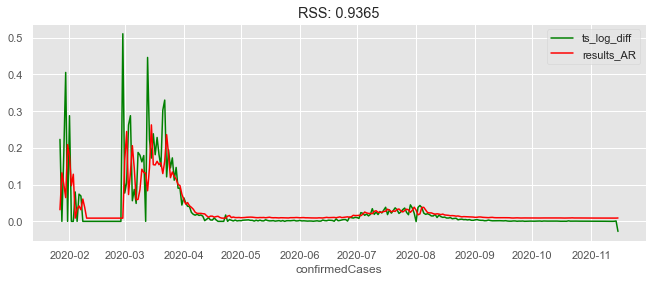

In [332]:
arima_model('confirmedCases',(2, 1, 0))

/Users/vrishaparekh/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/vrishaparekh/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


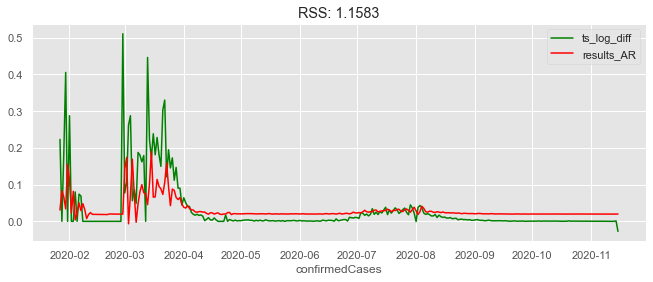

In [333]:
arima_model('confirmedCases',(0, 1, 2))

/Users/vrishaparekh/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/vrishaparekh/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


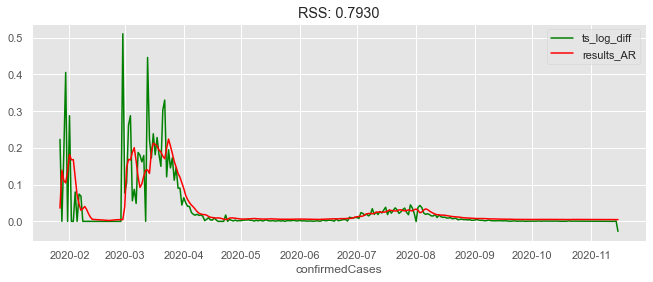

In [334]:
arima_model('confirmedCases',(2, 1, 2))

/Users/vrishaparekh/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/vrishaparekh/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


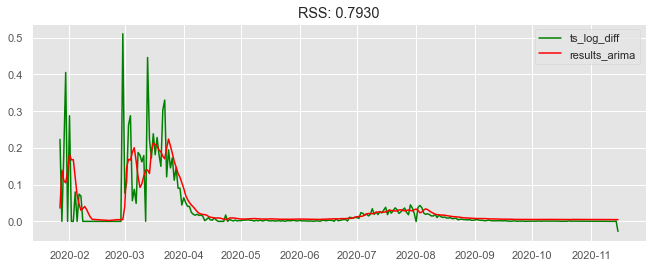

In [335]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_arima = model.fit(disp=-1)  
plt.plot(ts_log_diff, color='green',label='ts_log_diff')
plt.plot(results_arima.fittedvalues, color='red',label='results_arima')
plt.title('RSS: %.4f'% sum((results_arima.fittedvalues-ts_log_diff)**2))
plt.legend(loc='best')
plt.show()

In [336]:
dataHubCasesNational.index

DatetimeIndex(['2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
               '2020-02-02', '2020-02-03',
               ...
               '2020-11-06', '2020-11-07', '2020-11-08', '2020-11-09',
               '2020-11-10', '2020-11-11', '2020-11-12', '2020-11-13',
               '2020-11-14', '2020-11-15'],
              dtype='datetime64[ns]', name='dates', length=296, freq='D')

### Transforming back to original scale

In [337]:
predictions_ARIMA_diff = pd.Series(results_arima.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

dates
2020-01-27    0.036105
2020-01-28    0.139018
2020-01-29    0.111492
2020-01-30    0.104878
2020-01-31    0.136623
dtype: float64


In [259]:
predictions_ARIMA_diff.isna().any()

False

In [338]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

dates
2020-01-27    0.036105
2020-01-28    0.175122
2020-01-29    0.286615
2020-01-30    0.391493
2020-01-31    0.528116
dtype: float64


In [261]:
predictions_ARIMA_diff_cumsum.isna().any()

False

In [339]:
predictions_ARIMA_log = pd.Series(ts_log[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

dates
2020-01-26    1.386294
2020-01-27    1.422399
2020-01-28    1.561417
2020-01-29    1.672909
2020-01-30    1.777787
dtype: float64

Text(0.5, 1.0, 'RMSE: nan')

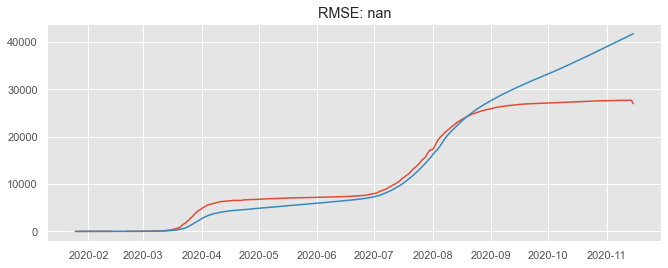

In [340]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(dataHubCasesNational['confirmedCases'])
plt.plot(predictions_ARIMA)
temp=predictions_ARIMA-dataHubCasesNational['confirmedCases']
replaceInfinity(temp)

plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-dataHubCasesNational['confirmedCases'])**2)/len(dataHubCasesNational['confirmedCases'])))

